In [9]:
from keras.datasets import reuters as ru 

In [17]:
(train_data , train_labels),(test_data , test_labels)=reuters.load_data(num_words=10000)

In [18]:
print(len(train_data))

8982


In [19]:
len(test_data)

2246

In [20]:
#decoding newswires to text 
word_index = ru.get_word_index()
reverse_word=dict([(value ,key) for (key , value) in word_index.items()])
decode_news=' '.join([reverse_word.get(i-3, "?") for i in train_data[0]])

In [24]:
#encoding the integer sequence into a binary matrix for 
import numpy as np 
def vect_seq (sequences,dimension=10000):
    #creates an all zero matrix of shape((len(sequences), dimension))
    result= np.zeros((len(sequences), dimension))
    for i , sequence in enumerate(sequences):
        #sets specific indices of results [i] to 1
        result[i ,sequence]=1
    return result 

#vectorize training and testing data
x_train= vect_seq(train_data)
x_test= vect_seq (test_data)

In [34]:
#vectorize the labels 

def to_one_hot(labels , dimension=46):
    result=np.zeros((len(labels),dimension))
    for i ,label in enumerate(labels):
        result[i , label]=1
    return result

#vectorize train and test data
y_train=to_one_hot(train_labels)
y_test=to_one_hot(test_labels)

In [40]:
#Buliding the network 
from keras import models 
from keras import layers 

model=models.Sequential()
model.add(layers.Dense(64, activation='relu' , input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu' ))
model.add(layers.Dense(46, activation='softmax' ))

In [41]:
#compiling the model
model.compile(optimizer="rmsprop" , loss='categorical_crossentropy' , metrics=["accuracy"])

In [42]:
#let's set apart 1000 samples in the training data to use as a validation set.
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=y_train[:1000]
partial_y_train=y_train[1000:]

In [43]:
#let's now train the network for 20 epochs
#training the model 
history=model.fit(partial_x_train , partial_y_train ,epochs=20, batch_size=512,validation_data=(x_val , y_val))

Epoch 1/20
16/16 [==============================] - 25s 128ms/step - loss: 3.1773 - accuracy: 0.4224 - val_loss: 1.7750 - val_accuracy: 0.6400
Epoch 2/20
16/16 [==============================] - 1s 78ms/step - loss: 1.5392 - accuracy: 0.6889 - val_loss: 1.2965 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 1s 60ms/step - loss: 1.1047 - accuracy: 0.7728 - val_loss: 1.1234 - val_accuracy: 0.7460
Epoch 4/20
16/16 [==============================] - 1s 60ms/step - loss: 0.8453 - accuracy: 0.8231 - val_loss: 1.0270 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 1s 59ms/step - loss: 0.6648 - accuracy: 0.8692 - val_loss: 0.9594 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 1s 59ms/step - loss: 0.5375 - accuracy: 0.8926 - val_loss: 0.9136 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 1s 59ms/step - loss: 0.4338 - accuracy: 0.9124 - val_loss: 0.8980 - val_accuracy: 0.8040
Epoch 8/20


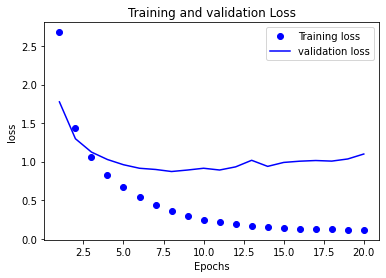

In [45]:
#finally display its loss and accuracy curves 
#plotting the training and validation loss 
history_dict=history.history
import matplotlib.pyplot as plt 
loss=history_dict['loss']
val_loss=history_dict['val_loss']
acc=history_dict['accuracy']
epochs=range(1 ,len(acc)+1)

plt.plot(epochs , loss , 'bo' , label='Training loss')
plt.plot(epochs , val_loss , 'b' , label='validation loss')
plt.title("Training and validation Loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

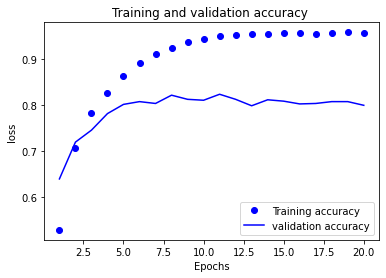

In [46]:
#plotting training and validation accuracy 
plt.clf()
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
plt.plot(epochs , acc , 'bo' , label='Training accuracy')
plt.plot(epochs , val_acc , 'b' , label='validation accuracy')
plt.title("Training and validation accuracy ")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()